Outlines :
1. Importing libraries
2. Missing values imputation(data preprocessing)
3. EDA
4. Feature Engineering
5. Model Building
6. Model evaluation


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
wine_df = pd.read_csv(r'C:\Users\aryan\Desktop\DataSets-master\winequality-red.csv')

In [3]:
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
wine_df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [5]:

wine_df.shape

(1599, 12)

In [6]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
wine_df['chlorides'].describe()

count    1599.000000
mean        0.087467
std         0.047065
min         0.012000
25%         0.070000
50%         0.079000
75%         0.090000
max         0.611000
Name: chlorides, dtype: float64

#  EDA 

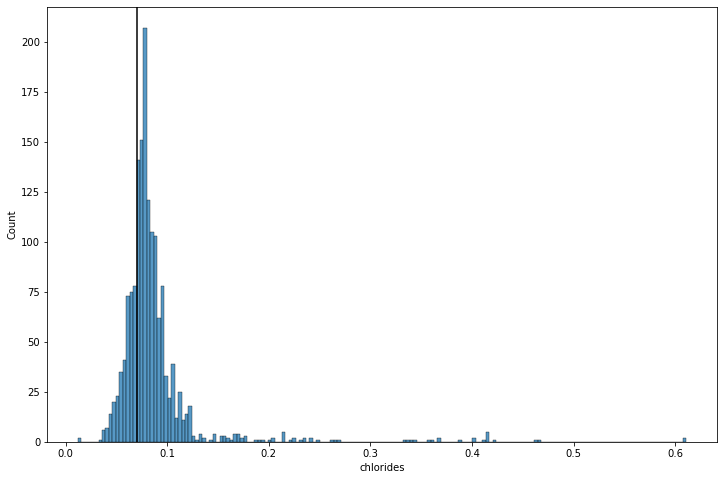

In [10]:
### histplot
plt.figure(figsize=(12,8))
sns.histplot(data=wine_df,x= 'chlorides')
plt.axvline( 0.070000,color='black')

In [11]:
feature_= wine_df.columns[:-1]
def get_percentile(feature,q_range):
    dist = wine_df[feature].describe()[str(q_range)+'%']
    return round(dist,2)
def counterplots():
    fig = plt.figure(figsize=(18,20))
    for column, feature in enumerate(feature_):
        fig.add_subplot(4,3,column+1)
        q1 = get_percentile(feature,25)
        q2 = get_percentile(feature,50)
        q3 = get_percentile(feature,75)
        sns.histplot(data=wine_df,x=feature, kde=True,color='orange')
        plt.axvline( q1,color='black',label='Q1')
        plt.axvline( q2,color='green',label='Q2')
        plt.axvline( q3,color='red',label='Q3')
        plt.legend()


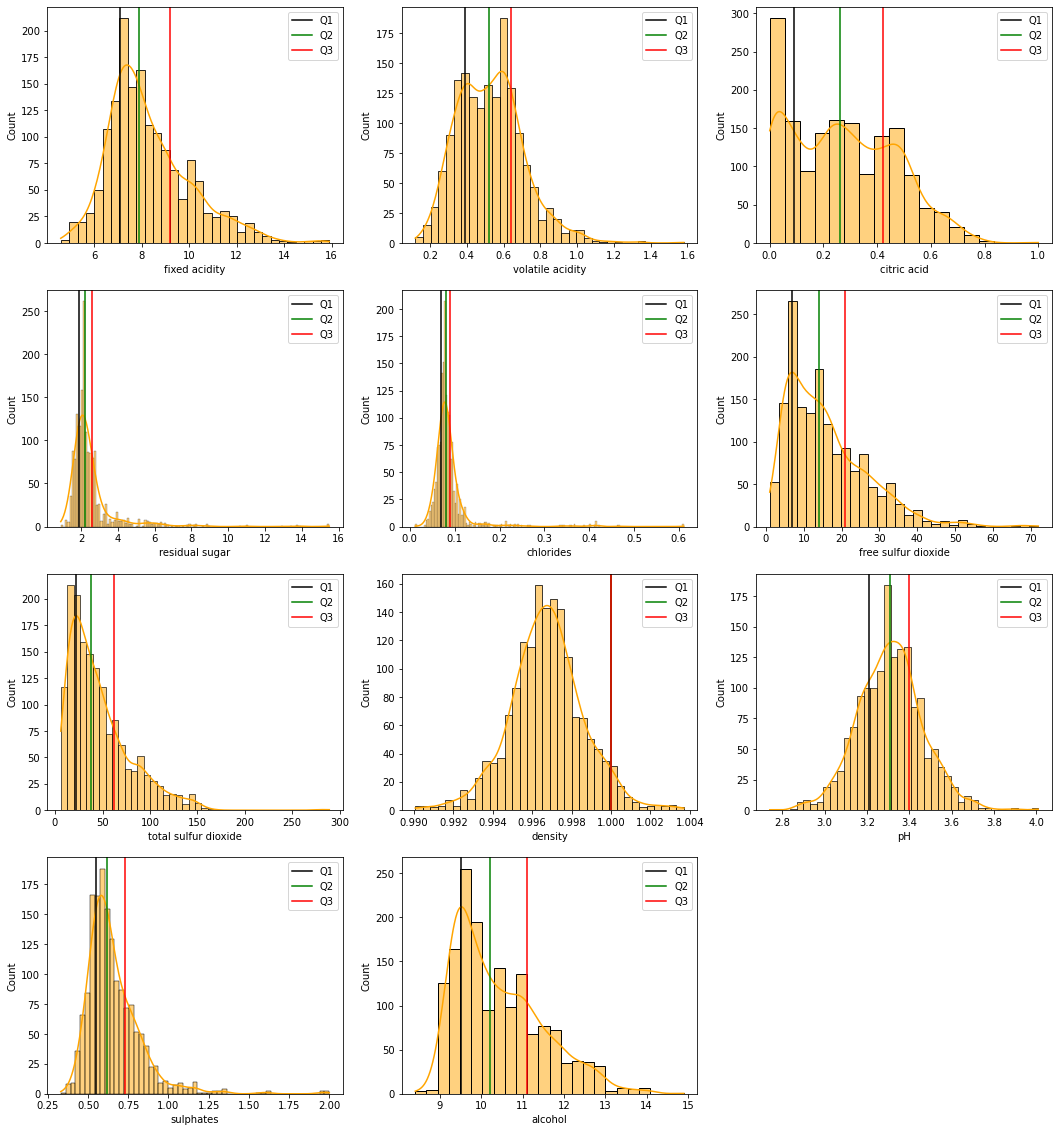

In [12]:
counterplots()

Text(0, 0.5, 'count')

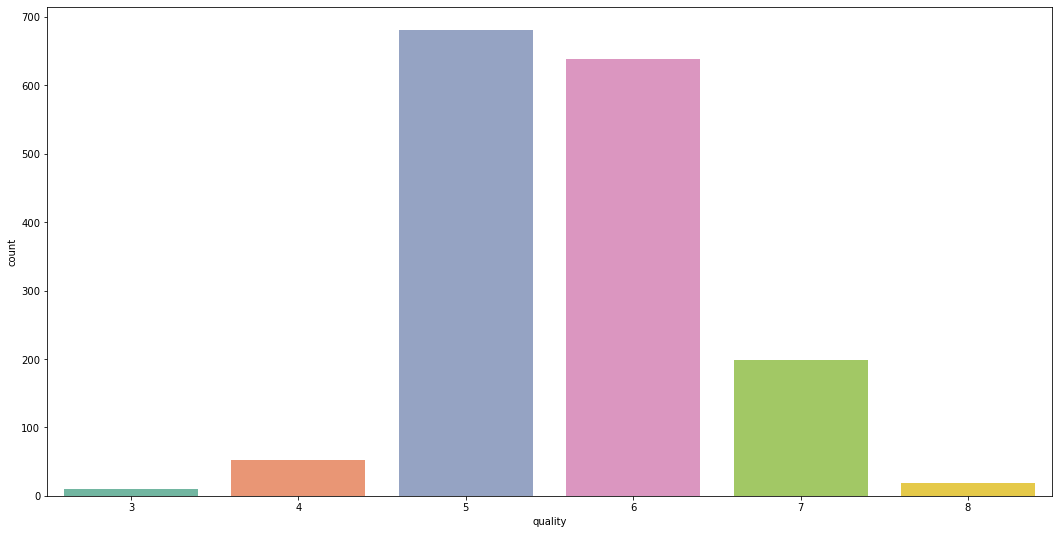

In [13]:
plt.figure(figsize=(18,9))
ax1 = sns.countplot(x='quality',data=wine_df,palette='Set2')
plt.xlabel('quality')
plt.ylabel('count')

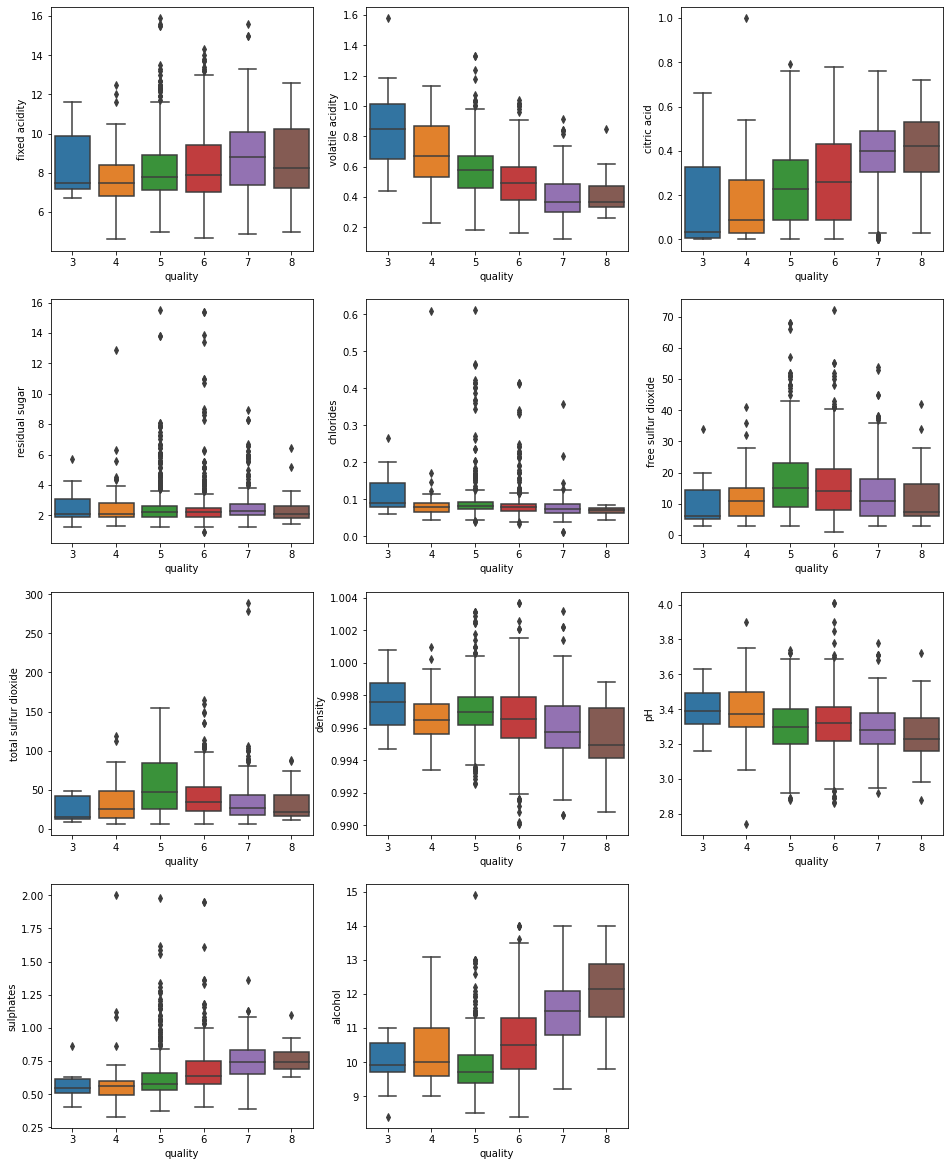

In [14]:
features_ = wine_df.columns[:-1]
fig = plt.figure(figsize=(16,26))
for column, feature in enumerate(features_):
    fig.add_subplot(5,3,column+1)
    sns.boxplot(data=wine_df,x='quality',y=feature)
    

# Feature Engineering


In [15]:
from sklearn.ensemble import RandomForestRegressor

In [18]:
model = RandomForestRegressor()
x = wine_df.drop(['quality'],axis=1)
model.fit(x,wine_df.quality)



##store the info and feature names
features = wine_df.columns
importances = model.feature_importances_
sorted_index = np.argsort(importances)[:]


In [19]:
sorted_index

array([ 2,  5,  7,  0,  3,  8,  4,  6,  1,  9, 10], dtype=int64)

In [20]:
importances

array([0.05345974, 0.13101755, 0.04665003, 0.05565463, 0.06412441,
       0.04799641, 0.07920926, 0.05216912, 0.05990045, 0.13815212,
       0.27166627])

([<matplotlib.axis.YTick at 0x297c0545bb0>,
 [Text(0, 0, 'citric acid'),
  Text(0, 1, 'free sulfur dioxide'),
  Text(0, 2, 'density'),
  Text(0, 3, 'fixed acidity'),
  Text(0, 4, 'residual sugar'),
  Text(0, 5, 'pH'),
  Text(0, 6, 'chlorides'),
  Text(0, 7, 'total sulfur dioxide'),
  Text(0, 8, 'volatile acidity'),
  Text(0, 9, 'sulphates'),
  Text(0, 10, 'alcohol')])

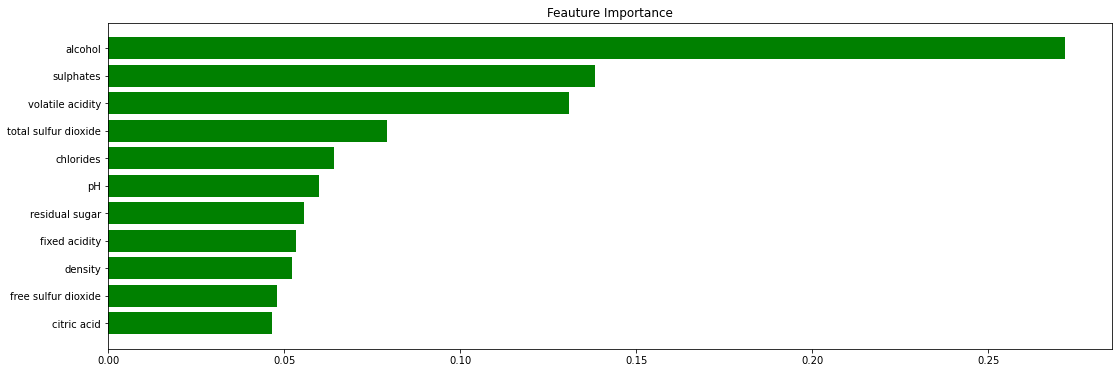

In [25]:
plt.figure(figsize=(18,6))
plt.title('Feauture Importance')
plt.barh(range(len(sorted_index)),importances[sorted_index],color='green')
plt.yticks(range(len(sorted_index)),[features[i] for i in sorted_index])

<AxesSubplot:>

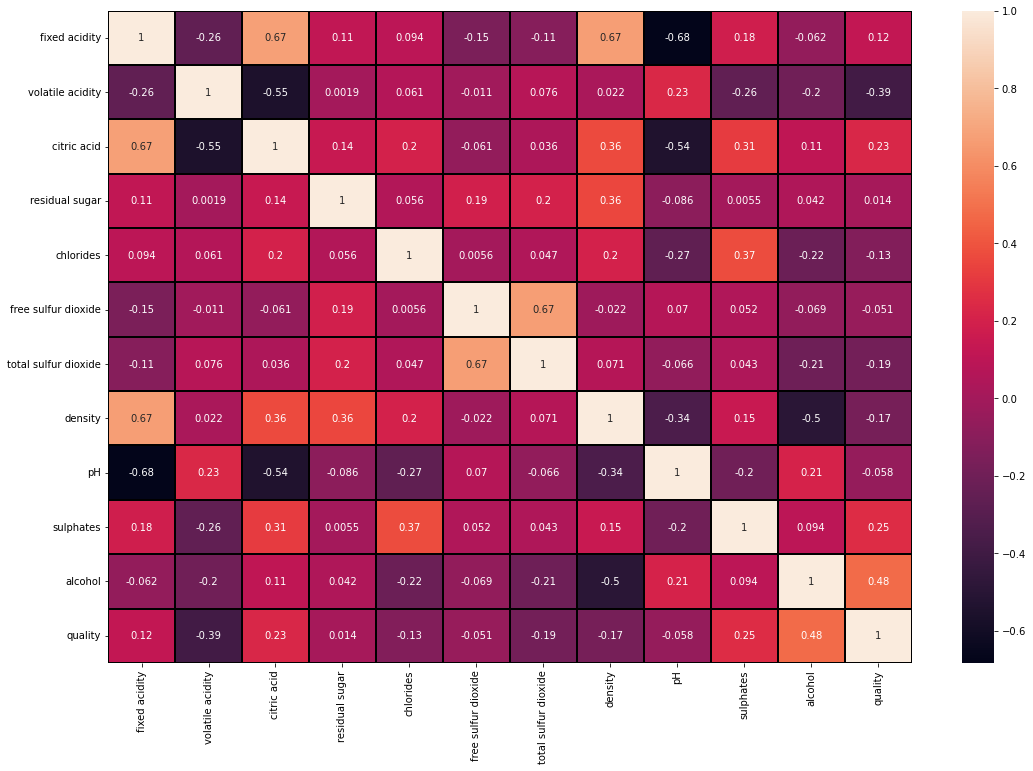

In [28]:
plt.figure(figsize=(18,12))
sns.heatmap(wine_df.corr(),annot=True,linecolor='black',linewidths=2.0)

<AxesSubplot:>

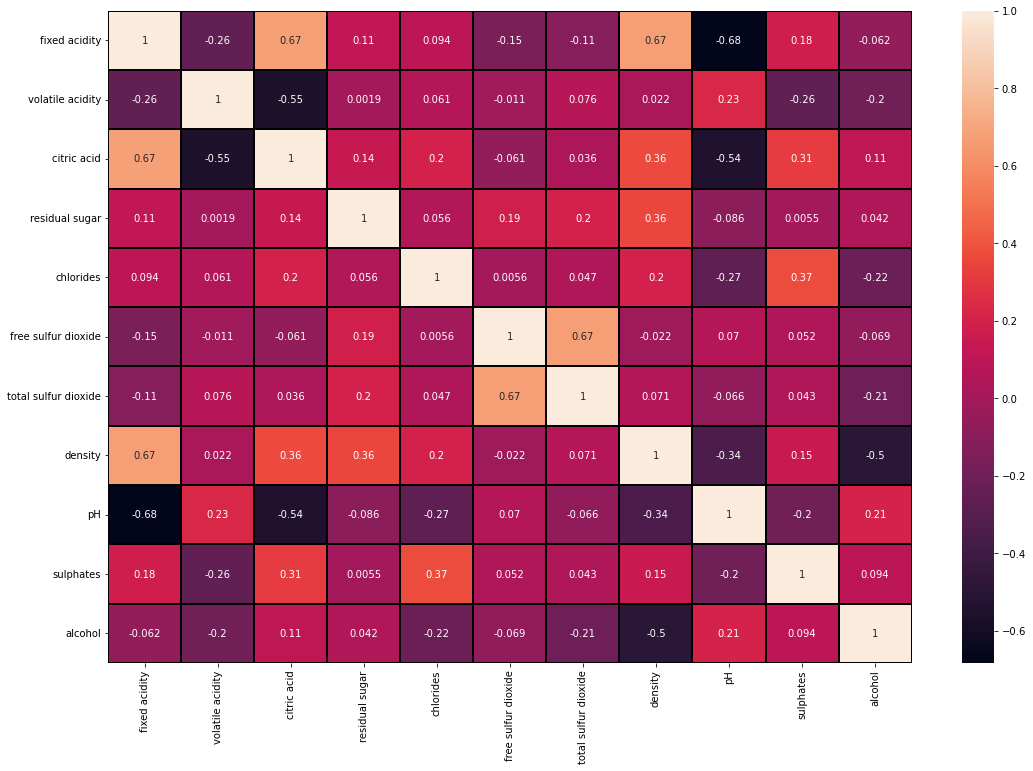

In [29]:
plt.figure(figsize=(18,12))
sns.heatmap(x.corr(),annot=True,linecolor='black',linewidths=2.0)

In [30]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [31]:
from imblearn.over_sampling import SMOTE



In [32]:
x = wine_df.drop(['quality'],axis = 1)
y = wine_df['quality']
smote = SMOTE(sampling_strategy='auto')

x_sm,y_sm = smote.fit_resample(x,y)

In [35]:
y_sm.value_counts()

5    681
6    681
7    681
4    681
8    681
3    681
Name: quality, dtype: int64

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [37]:
x_sm[x_sm.columns] = scaler.fit_transform(x_sm[x_sm.columns])

In [38]:
x_sm

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.575904,0.472778,-1.351495,-0.570691,-0.287857,-0.245833,-0.090143,0.687234,1.180414,-0.621784,-1.127491
1,-0.333030,1.209026,-1.351495,-0.006235,0.187644,1.199196,1.081068,0.147937,-0.834034,0.134766,-0.784995
2,-0.333030,0.718194,-1.153529,-0.248145,0.057962,0.167032,0.619682,0.255797,-0.444141,-0.054371,-0.784995
3,1.731401,-1.245136,1.420030,-0.570691,-0.309471,0.373465,0.832629,0.795093,-1.093962,-0.495692,-0.784995
4,-0.575904,0.472778,-1.351495,-0.570691,-0.287857,-0.245833,-0.090143,0.687234,1.180414,-0.621784,-1.127491
...,...,...,...,...,...,...,...,...,...,...,...
4081,0.013612,-0.312366,0.489361,-0.073311,-0.309667,-0.607559,-0.699462,-1.812047,-0.888677,0.312729,1.738198
4082,0.079958,-0.704008,0.553257,-0.658229,-0.473716,-0.788420,-0.867912,-0.697734,0.073954,0.419063,0.717272
4083,0.677738,-0.800917,1.156922,-0.504296,-0.400852,-0.705750,-0.728985,-0.710600,-0.857917,0.140334,1.234120
4084,1.199476,-1.017977,1.314504,0.040416,-0.355017,-0.835275,-0.718718,0.238855,-1.158944,0.438033,0.415874


In [39]:
#pip install tensorflow

Note: you may need to restart the kernel to use updated packages.
  Using cached tensorboard_data_server-0.6.1-py3-none-any.whl (2.4 kB)


In [64]:
from sklearn.model_selection import train_test_split

In [65]:
x_train,x_test,y_train,y_test = train_test_split(x_sm,y_sm,train_size=0.8,random_state=25)

In [66]:
x_train.shape

(3268, 11)

In [67]:
x_test.shape

(818, 11)

In [68]:
y_train.shape

(3268,)

In [69]:
y_test.shape

(818,)

# Model Building and evaluation

In [70]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.layers import Dropout

In [71]:
model = Sequential()
#########################################################

model.add(tensorflow.keras.layers.Input(shape=11,))

#########################################################

model.add(tensorflow.keras.layers.Dense(32,activation='relu'))
model.add(tensorflow.keras.layers.Dense(64,activation='relu'))
model.add(tensorflow.keras.layers.Dropout(0.3))
model.add(tensorflow.keras.layers.Dense(128,activation='relu'))
model.add(tensorflow.keras.layers.Dropout(0.3))

#########################################################

model.add(tensorflow.keras.layers.Dense(6,activation='softmax'))

#########################################################

In [72]:
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics='accuracy')

In [73]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.fit_transform(y_test)

In [74]:
y_train = tensorflow.keras.utils.to_categorical(y_train,6)
y_test = tensorflow.keras.utils.to_categorical(y_test,6)

In [76]:
model.fit(x_train,y_train,epochs=800,verbose = 1)

Epoch 1/800
103/103 [==============================] - 1s 8ms/step - loss: 1.1325 - accuracy: 0.5177
Epoch 2/800
103/103 [==============================] - 1s 9ms/step - loss: 1.0383 - accuracy: 0.5768
Epoch 3/800
103/103 [==============================] - 1s 8ms/step - loss: 0.9595 - accuracy: 0.6102
Epoch 4/800
103/103 [==============================] - 1s 8ms/step - loss: 0.9125 - accuracy: 0.6282
Epoch 5/800
103/103 [==============================] - 1s 10ms/step - loss: 0.8687 - accuracy: 0.6515
Epoch 6/800
103/103 [==============================] - 1s 9ms/step - loss: 0.8259 - accuracy: 0.6692
Epoch 7/800
103/103 [==============================] - 1s 8ms/step - loss: 0.7919 - accuracy: 0.6919
Epoch 8/800
103/103 [==============================] - 1s 9ms/step - loss: 0.7636 - accuracy: 0.6940
Epoch 9/800
103/103 [==============================] - 1s 10ms/step - loss: 0.7551 - accuracy: 0.7093
Epoch 10/800
103/103 [==============================] - 1s 10ms/step - loss: 0.7334 - acc

103/103 [==============================] - 1s 8ms/step - loss: 0.3411 - accuracy: 0.8657
Epoch 82/800
103/103 [==============================] - 1s 9ms/step - loss: 0.3405 - accuracy: 0.8675
Epoch 83/800
103/103 [==============================] - 1s 10ms/step - loss: 0.3300 - accuracy: 0.8675
Epoch 84/800
103/103 [==============================] - 1s 9ms/step - loss: 0.3348 - accuracy: 0.8641
Epoch 85/800
103/103 [==============================] - 1s 8ms/step - loss: 0.3396 - accuracy: 0.8614
Epoch 86/800
103/103 [==============================] - 1s 8ms/step - loss: 0.3391 - accuracy: 0.8647
Epoch 87/800
103/103 [==============================] - 1s 7ms/step - loss: 0.3284 - accuracy: 0.8733
Epoch 88/800
103/103 [==============================] - 1s 7ms/step - loss: 0.3383 - accuracy: 0.8559
Epoch 89/800
103/103 [==============================] - 1s 7ms/step - loss: 0.3345 - accuracy: 0.8620
Epoch 90/800
103/103 [==============================] - 1s 7ms/step - loss: 0.3251 - accuracy:

103/103 [==============================] - 0s 2ms/step - loss: 0.2564 - accuracy: 0.8972
Epoch 161/800
103/103 [==============================] - 0s 2ms/step - loss: 0.2642 - accuracy: 0.8960
Epoch 162/800
103/103 [==============================] - 0s 2ms/step - loss: 0.2415 - accuracy: 0.9070
Epoch 163/800
103/103 [==============================] - 0s 1ms/step - loss: 0.2541 - accuracy: 0.8993
Epoch 164/800
103/103 [==============================] - 0s 2ms/step - loss: 0.2412 - accuracy: 0.9018
Epoch 165/800
103/103 [==============================] - 0s 1ms/step - loss: 0.2437 - accuracy: 0.9045
Epoch 166/800
103/103 [==============================] - 0s 2ms/step - loss: 0.2678 - accuracy: 0.8969
Epoch 167/800
103/103 [==============================] - 0s 1ms/step - loss: 0.2507 - accuracy: 0.9002
Epoch 168/800
103/103 [==============================] - 0s 1ms/step - loss: 0.2548 - accuracy: 0.8944
Epoch 169/800
103/103 [==============================] - 0s 2ms/step - loss: 0.2457 - a

103/103 [==============================] - 0s 2ms/step - loss: 0.2354 - accuracy: 0.9106
Epoch 240/800
103/103 [==============================] - 0s 2ms/step - loss: 0.2069 - accuracy: 0.9186
Epoch 241/800
103/103 [==============================] - 0s 1ms/step - loss: 0.2078 - accuracy: 0.9217
Epoch 242/800
103/103 [==============================] - 0s 2ms/step - loss: 0.2122 - accuracy: 0.9198
Epoch 243/800
103/103 [==============================] - 0s 1ms/step - loss: 0.2141 - accuracy: 0.9103
Epoch 244/800
103/103 [==============================] - 0s 2ms/step - loss: 0.2112 - accuracy: 0.9149
Epoch 245/800
103/103 [==============================] - 0s 1ms/step - loss: 0.2338 - accuracy: 0.9012
Epoch 246/800
103/103 [==============================] - 0s 2ms/step - loss: 0.2268 - accuracy: 0.9079
Epoch 247/800
103/103 [==============================] - 0s 1ms/step - loss: 0.2020 - accuracy: 0.9159
Epoch 248/800
103/103 [==============================] - 0s 2ms/step - loss: 0.2156 - a

103/103 [==============================] - 0s 2ms/step - loss: 0.1774 - accuracy: 0.9308
Epoch 319/800
103/103 [==============================] - 0s 2ms/step - loss: 0.1859 - accuracy: 0.9299
Epoch 320/800
103/103 [==============================] - 0s 1ms/step - loss: 0.1975 - accuracy: 0.9278
Epoch 321/800
103/103 [==============================] - 0s 2ms/step - loss: 0.1868 - accuracy: 0.9266
Epoch 322/800
103/103 [==============================] - 0s 2ms/step - loss: 0.1924 - accuracy: 0.9318
Epoch 323/800
103/103 [==============================] - 0s 2ms/step - loss: 0.1947 - accuracy: 0.9204
Epoch 324/800
103/103 [==============================] - 0s 2ms/step - loss: 0.1907 - accuracy: 0.9290
Epoch 325/800
103/103 [==============================] - 0s 2ms/step - loss: 0.1903 - accuracy: 0.9275
Epoch 326/800
103/103 [==============================] - 0s 2ms/step - loss: 0.1991 - accuracy: 0.9241
Epoch 327/800
103/103 [==============================] - 0s 2ms/step - loss: 0.1834 - a

103/103 [==============================] - 0s 3ms/step - loss: 0.1692 - accuracy: 0.9339
Epoch 398/800
103/103 [==============================] - 0s 3ms/step - loss: 0.1770 - accuracy: 0.9321
Epoch 399/800
103/103 [==============================] - 0s 3ms/step - loss: 0.1669 - accuracy: 0.9351
Epoch 400/800
103/103 [==============================] - 0s 3ms/step - loss: 0.1953 - accuracy: 0.9345
Epoch 401/800
103/103 [==============================] - 0s 3ms/step - loss: 0.1638 - accuracy: 0.9397
Epoch 402/800
103/103 [==============================] - 0s 2ms/step - loss: 0.1712 - accuracy: 0.9345
Epoch 403/800
103/103 [==============================] - 0s 3ms/step - loss: 0.1584 - accuracy: 0.9425
Epoch 404/800
103/103 [==============================] - 0s 3ms/step - loss: 0.1663 - accuracy: 0.9339
Epoch 405/800
103/103 [==============================] - 0s 3ms/step - loss: 0.1765 - accuracy: 0.9256
Epoch 406/800
103/103 [==============================] - 0s 2ms/step - loss: 0.1806 - a

103/103 [==============================] - 0s 3ms/step - loss: 0.1733 - accuracy: 0.9318
Epoch 477/800
103/103 [==============================] - 0s 3ms/step - loss: 0.1652 - accuracy: 0.9367
Epoch 478/800
103/103 [==============================] - 0s 3ms/step - loss: 0.1682 - accuracy: 0.9373
Epoch 479/800
103/103 [==============================] - 0s 3ms/step - loss: 0.1748 - accuracy: 0.9290
Epoch 480/800
103/103 [==============================] - 0s 4ms/step - loss: 0.1464 - accuracy: 0.9403
Epoch 481/800
103/103 [==============================] - 0s 3ms/step - loss: 0.1696 - accuracy: 0.9293
Epoch 482/800
103/103 [==============================] - 0s 3ms/step - loss: 0.1676 - accuracy: 0.9385
Epoch 483/800
103/103 [==============================] - 0s 3ms/step - loss: 0.1611 - accuracy: 0.9385
Epoch 484/800
103/103 [==============================] - 0s 3ms/step - loss: 0.1786 - accuracy: 0.9364
Epoch 485/800
103/103 [==============================] - 0s 3ms/step - loss: 0.1587 - a

103/103 [==============================] - 0s 3ms/step - loss: 0.1479 - accuracy: 0.9458
Epoch 556/800
103/103 [==============================] - 0s 3ms/step - loss: 0.1427 - accuracy: 0.9443
Epoch 557/800
103/103 [==============================] - 0s 2ms/step - loss: 0.1473 - accuracy: 0.9449
Epoch 558/800
103/103 [==============================] - 0s 2ms/step - loss: 0.1594 - accuracy: 0.9406
Epoch 559/800
103/103 [==============================] - 0s 3ms/step - loss: 0.1486 - accuracy: 0.9465
Epoch 560/800
103/103 [==============================] - 0s 3ms/step - loss: 0.1721 - accuracy: 0.9339
Epoch 561/800
103/103 [==============================] - 0s 3ms/step - loss: 0.1397 - accuracy: 0.9477
Epoch 562/800
103/103 [==============================] - 0s 3ms/step - loss: 0.1551 - accuracy: 0.9428
Epoch 563/800
103/103 [==============================] - 0s 3ms/step - loss: 0.1578 - accuracy: 0.9391
Epoch 564/800
103/103 [==============================] - 0s 3ms/step - loss: 0.1581 - a

103/103 [==============================] - 0s 3ms/step - loss: 0.1433 - accuracy: 0.9443
Epoch 635/800
103/103 [==============================] - 0s 3ms/step - loss: 0.1474 - accuracy: 0.9440
Epoch 636/800
103/103 [==============================] - 0s 3ms/step - loss: 0.1422 - accuracy: 0.9452
Epoch 637/800
103/103 [==============================] - 0s 3ms/step - loss: 0.1572 - accuracy: 0.9422
Epoch 638/800
103/103 [==============================] - 0s 2ms/step - loss: 0.1479 - accuracy: 0.9425
Epoch 639/800
103/103 [==============================] - 0s 3ms/step - loss: 0.1492 - accuracy: 0.9474
Epoch 640/800
103/103 [==============================] - 0s 3ms/step - loss: 0.1405 - accuracy: 0.9477
Epoch 641/800
103/103 [==============================] - 0s 3ms/step - loss: 0.1490 - accuracy: 0.9443
Epoch 642/800
103/103 [==============================] - 0s 3ms/step - loss: 0.1512 - accuracy: 0.9422
Epoch 643/800
103/103 [==============================] - 0s 3ms/step - loss: 0.1540 - a

103/103 [==============================] - 0s 3ms/step - loss: 0.1405 - accuracy: 0.9471
Epoch 714/800
103/103 [==============================] - 0s 3ms/step - loss: 0.1532 - accuracy: 0.9400
Epoch 715/800
103/103 [==============================] - 0s 3ms/step - loss: 0.1386 - accuracy: 0.9446
Epoch 716/800
103/103 [==============================] - 0s 2ms/step - loss: 0.1464 - accuracy: 0.9431
Epoch 717/800
103/103 [==============================] - 0s 2ms/step - loss: 0.1452 - accuracy: 0.9480
Epoch 718/800
103/103 [==============================] - 0s 2ms/step - loss: 0.1602 - accuracy: 0.9385
Epoch 719/800
103/103 [==============================] - 0s 2ms/step - loss: 0.1361 - accuracy: 0.9507
Epoch 720/800
103/103 [==============================] - 0s 2ms/step - loss: 0.1372 - accuracy: 0.9529
Epoch 721/800
103/103 [==============================] - 0s 2ms/step - loss: 0.1452 - accuracy: 0.9474
Epoch 722/800
103/103 [==============================] - 0s 2ms/step - loss: 0.1333 - a

103/103 [==============================] - 0s 3ms/step - loss: 0.1454 - accuracy: 0.9477
Epoch 793/800
103/103 [==============================] - 0s 3ms/step - loss: 0.1503 - accuracy: 0.9431
Epoch 794/800
103/103 [==============================] - 0s 3ms/step - loss: 0.1465 - accuracy: 0.9529
Epoch 795/800
103/103 [==============================] - 0s 2ms/step - loss: 0.1333 - accuracy: 0.9513
Epoch 796/800
103/103 [==============================] - 0s 3ms/step - loss: 0.1608 - accuracy: 0.9416
Epoch 797/800
103/103 [==============================] - 0s 3ms/step - loss: 0.1365 - accuracy: 0.9446
Epoch 798/800
103/103 [==============================] - 0s 3ms/step - loss: 0.1498 - accuracy: 0.9474
Epoch 799/800
103/103 [==============================] - 0s 2ms/step - loss: 0.1419 - accuracy: 0.9513
Epoch 800/800
103/103 [==============================] - 0s 3ms/step - loss: 0.1476 - accuracy: 0.9465


In [77]:
y_pred = model.predict(x_test)

26/26 [==============================] - 0s 3ms/step


In [78]:
y_pred

array([[2.88018731e-16, 7.31293108e-17, 4.01401147e-03, 4.01076113e-06,
        9.95981932e-01, 3.61988009e-21],
       [1.15889984e-36, 1.72728846e-07, 9.21670198e-01, 7.83296376e-02,
        3.74845882e-29, 7.25089658e-33],
       [1.07140956e-12, 7.03677144e-29, 2.34923539e-11, 1.14521675e-14,
        2.32642255e-04, 9.99767363e-01],
       ...,
       [1.34724842e-09, 3.95690169e-23, 9.67937158e-05, 2.64918111e-04,
        5.42059657e-04, 9.99096274e-01],
       [6.99152635e-20, 1.94091608e-05, 3.15731555e-01, 6.84249043e-01,
        1.07210605e-08, 1.99088627e-28],
       [0.00000000e+00, 9.95488226e-01, 4.47381800e-03, 3.80199963e-05,
        1.82261934e-24, 0.00000000e+00]], dtype=float32)

In [79]:
y_pred = np.argmax(y_pred,axis=1)

In [80]:
y_pred

array([4, 2, 5, 1, 5, 0, 0, 0, 0, 3, 3, 1, 0, 0, 0, 3, 4, 0, 4, 3, 3, 1,
       2, 4, 1, 0, 3, 3, 5, 5, 0, 5, 5, 2, 2, 5, 4, 3, 0, 4, 3, 3, 0, 5,
       0, 4, 2, 4, 5, 4, 0, 2, 0, 3, 1, 2, 0, 2, 5, 3, 4, 1, 5, 5, 1, 0,
       0, 4, 0, 2, 3, 5, 3, 1, 3, 5, 3, 1, 3, 4, 1, 3, 4, 3, 2, 3, 4, 5,
       0, 4, 1, 1, 1, 5, 1, 2, 4, 5, 4, 5, 4, 2, 1, 1, 0, 4, 2, 1, 4, 1,
       3, 2, 1, 5, 2, 5, 4, 0, 4, 1, 2, 4, 2, 5, 1, 5, 2, 5, 1, 2, 2, 5,
       5, 5, 0, 3, 1, 2, 1, 2, 1, 5, 3, 1, 2, 5, 4, 0, 3, 4, 2, 2, 4, 1,
       2, 5, 3, 0, 4, 3, 5, 2, 1, 2, 1, 5, 0, 3, 1, 0, 5, 1, 4, 0, 0, 0,
       0, 1, 3, 1, 3, 4, 5, 4, 4, 1, 1, 0, 2, 0, 0, 4, 1, 4, 5, 0, 3, 0,
       2, 1, 4, 2, 0, 5, 1, 2, 2, 3, 4, 3, 3, 1, 5, 4, 4, 3, 0, 5, 0, 1,
       4, 0, 3, 5, 4, 5, 3, 0, 0, 4, 4, 4, 0, 0, 2, 1, 2, 4, 1, 5, 3, 3,
       5, 3, 4, 5, 3, 2, 3, 1, 2, 4, 2, 2, 5, 2, 4, 1, 4, 5, 0, 2, 4, 3,
       5, 5, 0, 5, 4, 1, 3, 4, 4, 0, 4, 1, 2, 5, 3, 2, 1, 2, 3, 3, 1, 4,
       5, 5, 1, 0, 0, 4, 0, 5, 3, 0, 4, 1, 0, 4, 1,

In [82]:
y_test = np.argmax(y_test,axis=1)

In [84]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       148
           1       0.98      0.96      0.97       140
           2       0.70      0.75      0.72       106
           3       0.68      0.69      0.69       143
           4       0.89      0.84      0.86       143
           5       0.99      0.99      0.99       138

    accuracy                           0.88       818
   macro avg       0.87      0.87      0.87       818
weighted avg       0.88      0.88      0.88       818



# END 